In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import pycountry_convert as pc
from geopy import geocoders
import time 
import json

/Users/luna/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os
os.getcwd()

'/Users/luna/Documents/EPFL/Master/MA2/DataViz/Racket-Science/Milestones/milestone 1/preprocessing'

do not run again

In [3]:
!pip install pycountry-convert

# The Goat on each Surface

These datasets contain information and statistics about ATP and WTA tour matches. However, what interests us specifically is the surface on which these matches were played, the city, and the tournament. Therefore, we first filter the dataset to retain only the relevant information.

nce there is one dataset for each year, we performed comparisons within each individual year. You can simply change the year argument to view the dataset for the year you're interested in.

In [4]:
# Print head of the filtered data, (the usefull informations)


data_folder = "data/ultimate_tennis_matches_dataset/"
wta_or_atp = "wta/"
year = "2024"
output_folder = f"results/surfaces/{year}/{wta_or_atp}"


ultimate = pd.read_excel(data_folder + wta_or_atp + year + ".xlsx") 

#ultimate_filtered = ultimate[['Date', 'Court', 'Surface', 'Winner', 'Loser', 'Location', 'Round', 'WRank', 'WPts']]

ultimate_filtered = ultimate[['Date', 'Surface', 'Winner', 'Tournament', 'Location']]

print(ultimate_filtered.head())

        Date Surface        Winner   Tournament  Location
0 2023-12-31    Hard     Wang Xiy.  ASB Classic  Auckland
1 2024-01-01    Hard  Avanesyan E.  ASB Classic  Auckland
2 2024-01-01    Hard    Navarro E.  ASB Classic  Auckland
3 2024-01-01    Hard   Tsurenko L.  ASB Classic  Auckland
4 2024-01-01    Hard      Parry D.  ASB Classic  Auckland


In [5]:
# Print the number of wins per players for each surface, across the whole dataset 
# (i.e. per year and not dependant of the location)

# Count the number of wins per surface for each winner
surface_counts = ultimate_filtered.groupby(['Winner', 'Surface']).size().unstack(fill_value=0)

print("The number of wins per players for each surface, across the whole dataset:\n")
# Display the results
print(surface_counts)

The number of wins per players for each surface, across the whole dataset:

Surface         Clay  Grass  Hard
Winner                           
Alexandrova E.     1      5    20
Andreescu B.       2      6     2
Andreeva E.        1      1     7
Andreeva M.       11      0    23
Anisimova A.       2      0    15
...              ...    ...   ...
Zhao C.            0      0     1
Zheng Q.          11      1    30
Zheng S.           0      0     1
Zhu L.             0      3     9
Zidansek T.        1      0     3

[210 rows x 3 columns]


In [6]:
# The best player for each surface across the whole dataset 
# (i.e. per year and not dependant of the location)

# Find the top player on each surface
grass = clay = hard = False

if 'Grass' in surface_counts: 
    grass = True 
    best_grass = surface_counts['Grass'].idxmax()
    print(f"Best Grass Court Player: {best_grass} with {surface_counts.loc[best_grass, 'Grass']} wins")
    
if 'Clay' in surface_counts:
    clay = True
    best_clay = surface_counts['Clay'].idxmax()
    print(f"Best Clay Court Player: {best_clay} with {surface_counts.loc[best_clay, 'Clay']} wins")

if 'Hard' in surface_counts: 
    hard = True
    best_hard = surface_counts['Hard'].idxmax()
    print(f"Best Hard Court Player: {best_hard} with {surface_counts.loc[best_hard, 'Hard']} wins")

Best Grass Court Player: Vekic D. with 11 wins
Best Clay Court Player: Swiatek I. with 21 wins
Best Hard Court Player: Sabalenka A. with 40 wins


# 1. Overall best players for each surface in {year}

Here, we plot the top 5 players on each surface for the selected year.

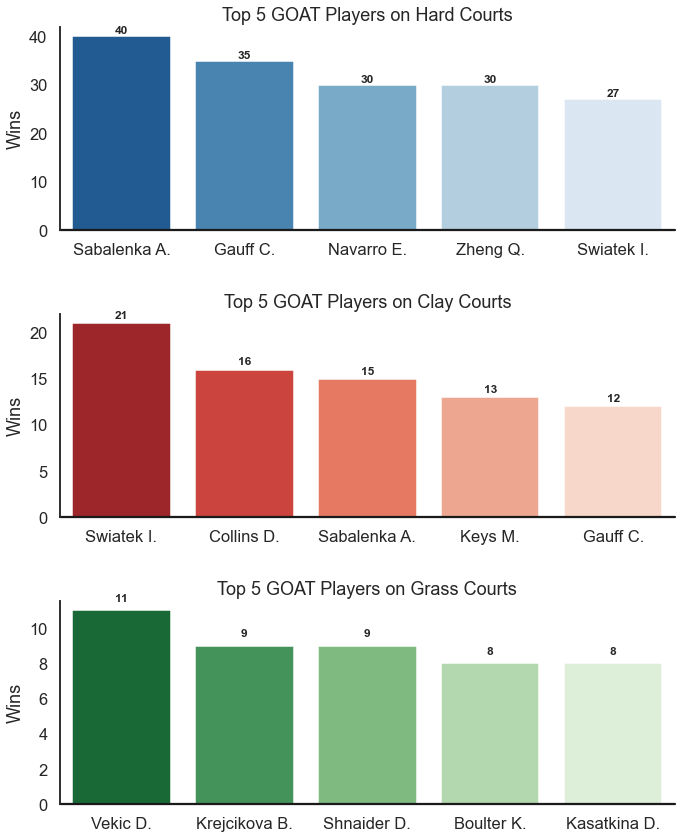

In [7]:
# Plot of the 5 best players on each surface across the whole dataset 
# (i.e. per year and not dependant of the location)

sns.set_theme(style="white", context="talk")

# Available surfaces in the dataset
available_surfaces = [surface for surface in ["Hard", "Clay", "Grass"] if surface in surface_counts]

for surface in available_surfaces:
    win_surface_df = surface_counts[surface].reset_index().sort_values(by=surface, ascending=False)
    win_surface_df.to_csv(output_folder + f"overall_goat_surfaces/wins_{surface.lower()}_{year}.csv", index=False)

# Find the top 5 players for each surface
top_players = {surface: surface_counts[[surface]].nlargest(5, surface).reset_index() for surface in available_surfaces}

fig, axes = plt.subplots(len(available_surfaces), 1, figsize=(10, 4 * len(available_surfaces)), sharex=False)

def add_annotations(ax, data, column):
    for i, v in enumerate(data[column]):
        ax.text(i, v + 0.5, str(v), ha='center', fontsize=12, fontweight='bold')

palette_map = {"Hard": "Blues_r", "Clay": "Reds_r", "Grass": "Greens_r"}

if len(available_surfaces) == 1:
    axes = [axes]

for i, surface in enumerate(available_surfaces):
    sns.barplot(
        x="Winner",
        y=surface,
        data=top_players[surface],
        palette=palette_map[surface],
        ax=axes[i]
    )
    axes[i].set_title(f"Top 5 GOAT Players on {surface} Courts")
    axes[i].set_ylabel("Wins")
    axes[i].set_xlabel("")
    axes[i].axhline(0, color="k", clip_on=False)
    add_annotations(axes[i], top_players[surface], surface)

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

plt.show()

# 3. Best players on each surface, per tournaments in {year}

Here, the analysis goes beyond just the year: it compares player performances by tournament to identify the GOATs of each one.

In [8]:
tournament_names = ultimate['Tournament'].unique()

# Count the number of matches per Tournament
tournament_counts = ultimate_filtered[['Tournament']].value_counts()

print(tournament_counts)

Tournament                                     
Wimbledon                                          127
Australian Open                                    127
US Open                                            127
French Open                                        127
Miami Open                                          95
China Open                                          95
Mutua Madrid Open                                   95
BNP Paribas Open                                    95
Internazionali BNL d'Italia                         95
Qatar Open                                          55
Dubai Duty Free Tennis Championships                55
Wuhan Open                                          55
Canadian Open                                       55
Western & Southern Financial Group Women's Open     55
Charleston Open                                     47
Brisbane International                              47
Thailand Open 2                                     31
Merida Open      

In [9]:
# Find the best player for each city on each surface 
# (Usually every city has only one surface's type)
# Save the classement in each city in {year} for each surface

tournament_results = {}
    
with open(output_folder + f'tournament_list/tournaments_{year}.json', 'w', encoding='utf-8') as f:
    json.dump(tournament_names.tolist(), f, ensure_ascii=False, indent=2)
    
def save_csv_tournament(df, surface, tournament): 
    sorted_df = df[surface].sort_values(ascending=False)
    file_name = output_folder + f"tournament_goat/{tournament}_goat_players_on_{surface}_{year}.csv"
    sorted_df.to_csv(file_name, index=True)

for tournament in tournament_names:

    tournament_df = ultimate[ultimate['Tournament'] == tournament]

    # Compute wins by surface for each tournament
    tournament_surface_counts = tournament_df.groupby(['Winner', 'Surface']).size().unstack(fill_value=0)

    tournament_results[tournament] = tournament_surface_counts
    
    print(f"Tournament: {tournament}")
    if 'Grass' in tournament_surface_counts: 
        best_grass = tournament_surface_counts['Grass'].idxmax()
        print(f"🎾 GOAT Grass Court Player in {tournament} in {year} 🎾: {best_grass} with {tournament_surface_counts.loc[best_grass, 'Grass']} wins")
        save_csv_tournament(tournament_surface_counts, 'Grass', tournament)
        
    if 'Clay' in tournament_surface_counts: 
        best_clay = tournament_surface_counts['Clay'].idxmax()
        print(f"🎾 GOAT Clay Court Player in {tournament} in {year} 🎾: {best_clay} with {tournament_surface_counts.loc[best_clay, 'Clay']} wins")
        save_csv_tournament(tournament_surface_counts, 'Clay', tournament)
        
    if 'Hard' in tournament_surface_counts: 
        best_hard = tournament_surface_counts['Hard'].idxmax()
        print(f"🎾 GOAT Hard Court Player in {tournament} in {year} 🎾: {best_hard} with {tournament_surface_counts.loc[best_hard, 'Hard']} wins")
        save_csv_tournament(tournament_surface_counts, 'Hard', tournament)
    print("="*40)
    

Tournament: ASB Classic
🎾 GOAT Hard Court Player in ASB Classic in 2024 🎾: Gauff C. with 5 wins
Tournament: Brisbane International
🎾 GOAT Hard Court Player in Brisbane International in 2024 🎾: Rybakina E. with 5 wins
Tournament: Adelaide International
🎾 GOAT Hard Court Player in Adelaide International in 2024 🎾: Ostapenko J. with 5 wins
Tournament: Hobart International
🎾 GOAT Hard Court Player in Hobart International in 2024 🎾: Navarro E. with 5 wins
Tournament: Australian Open
🎾 GOAT Hard Court Player in Australian Open in 2024 🎾: Sabalenka A. with 7 wins
Tournament: Thailand Open
🎾 GOAT Hard Court Player in Thailand Open in 2024 🎾: Shnaider D. with 5 wins
Tournament: Ladies Linz Open
🎾 GOAT Hard Court Player in Ladies Linz Open in 2024 🎾: Ostapenko J. with 4 wins
Tournament: Abu Dhabi WTA Women's Tennis Open
🎾 GOAT Hard Court Player in Abu Dhabi WTA Women's Tennis Open in 2024 🎾: Kasatkina D. with 4 wins
Tournament: Transylvania Open
🎾 GOAT Hard Court Player in Transylvania Open in 2

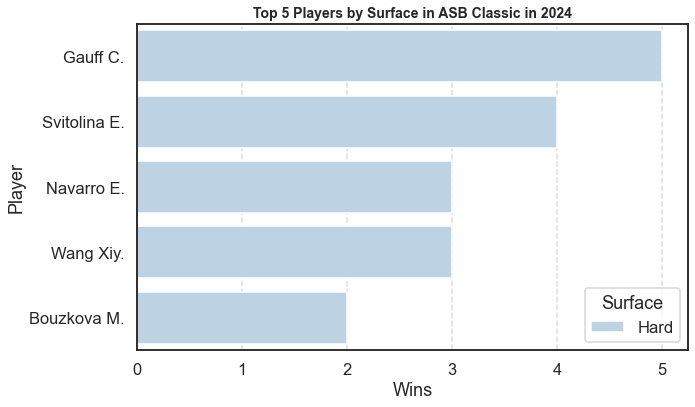

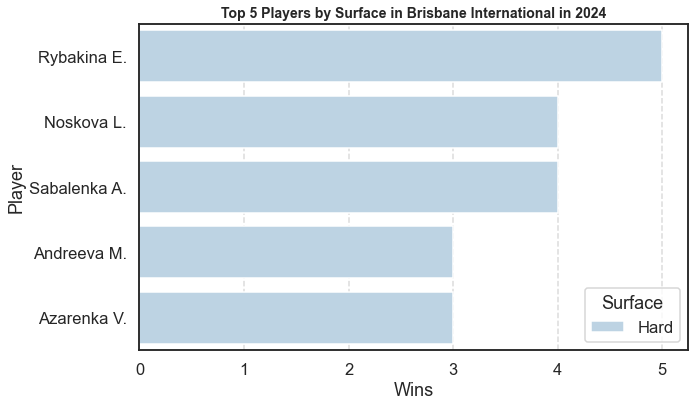

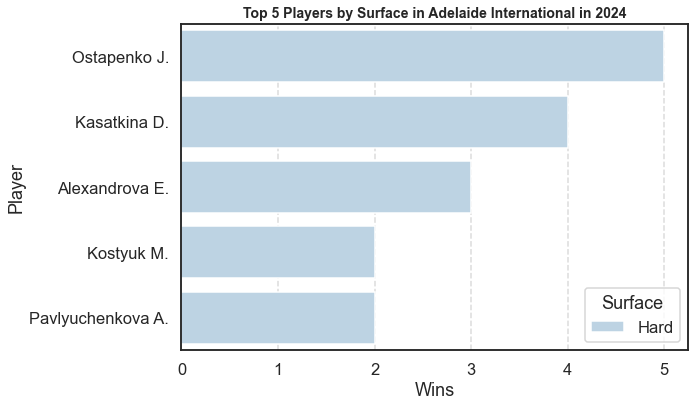

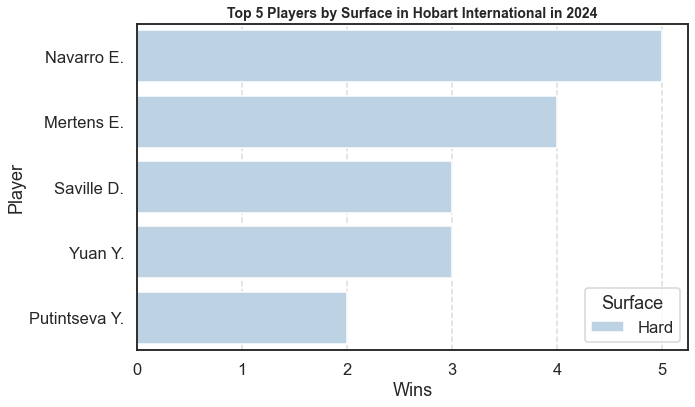

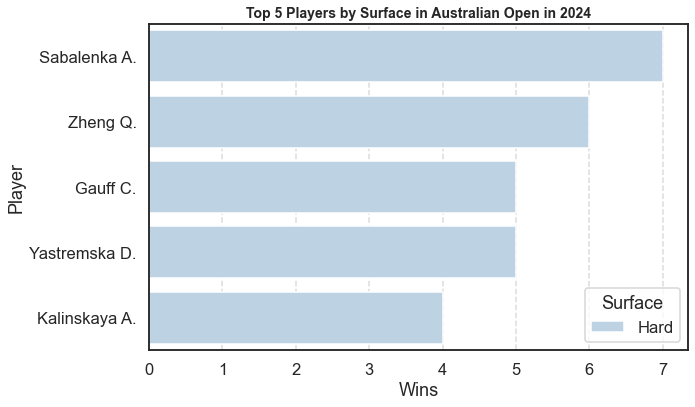

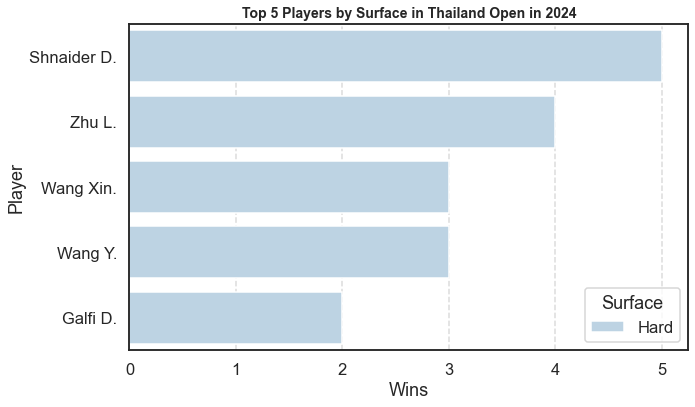

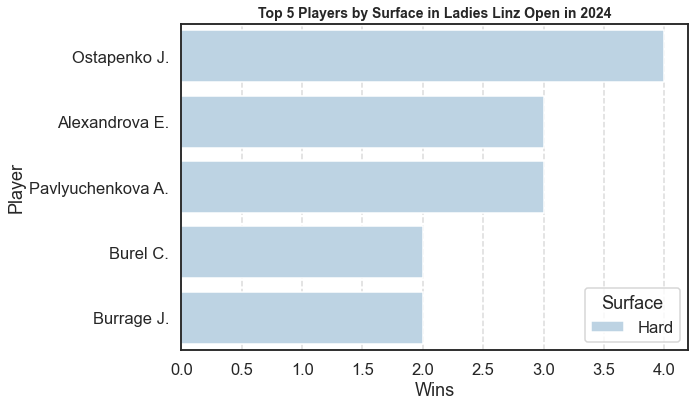

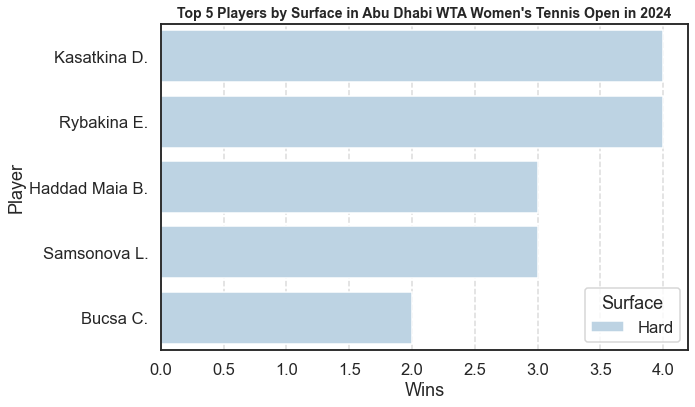

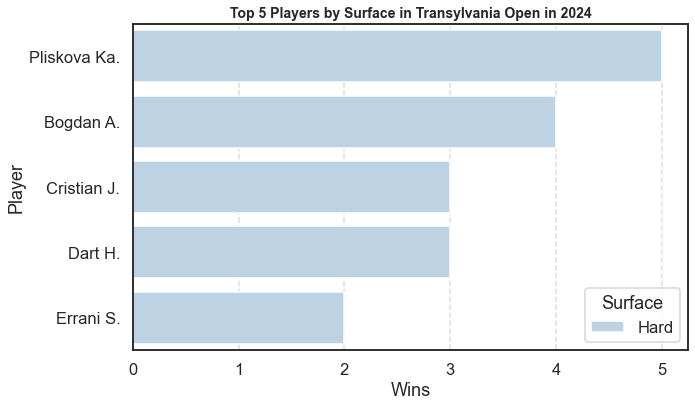

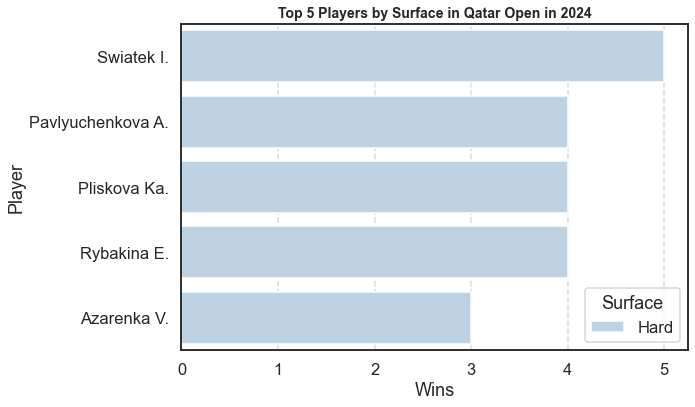

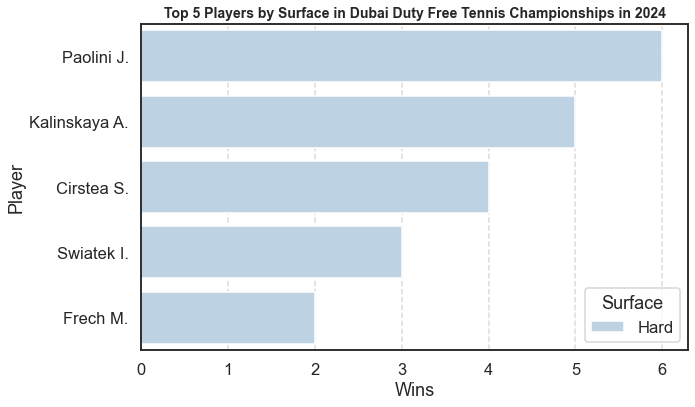

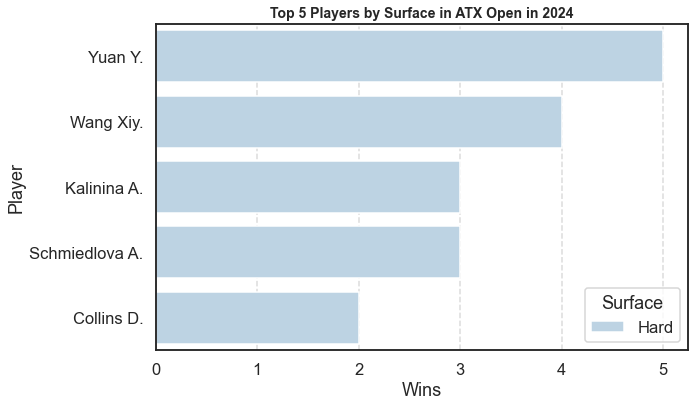

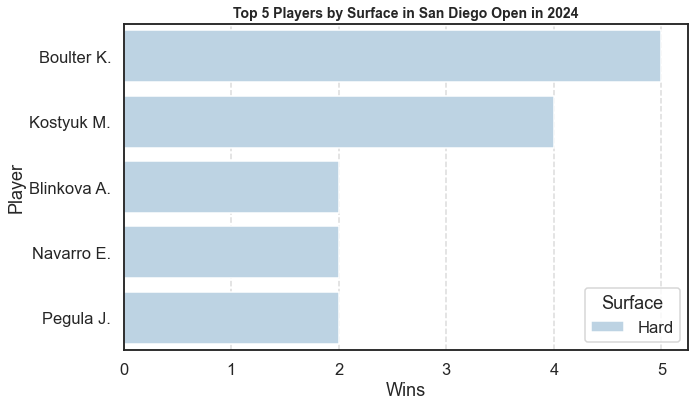

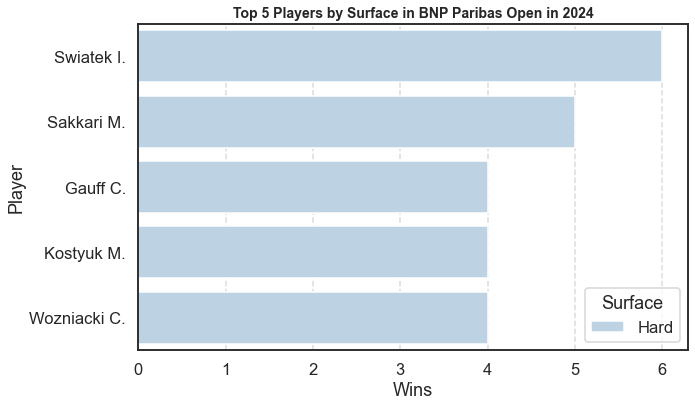

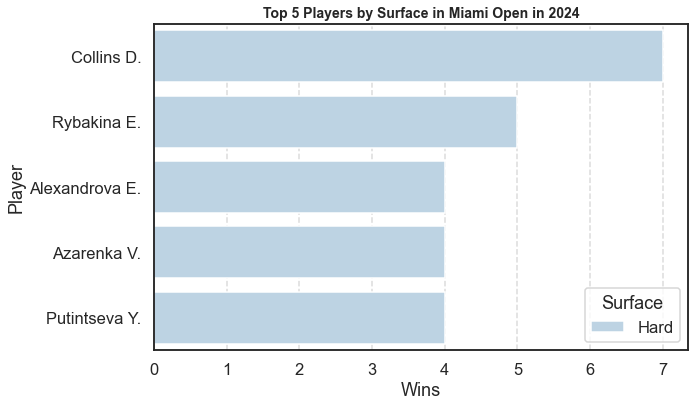

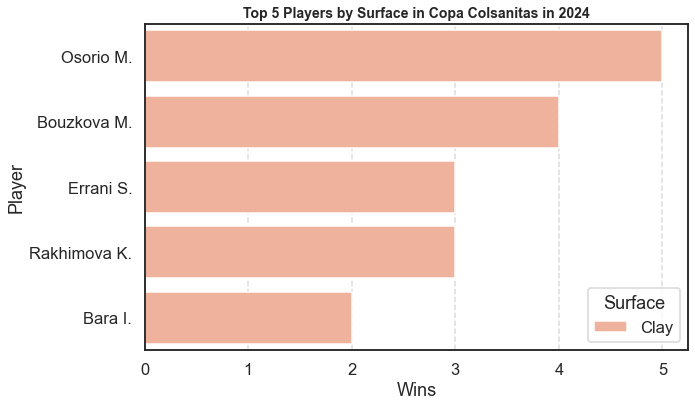

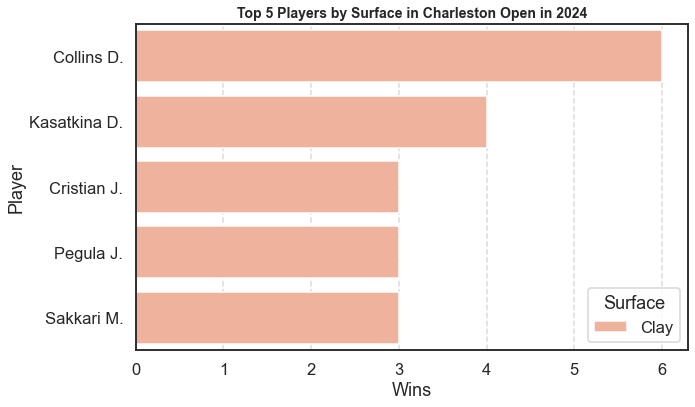

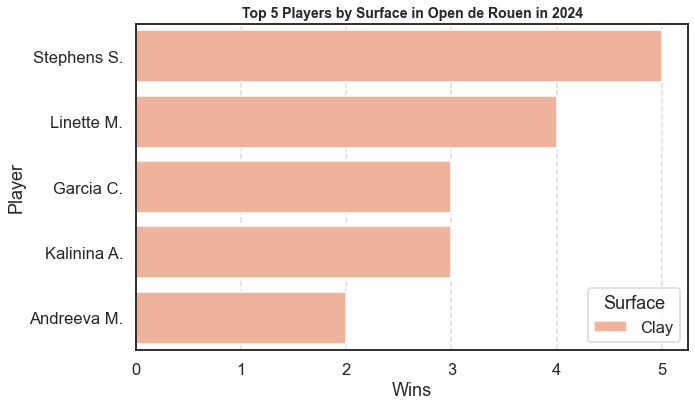

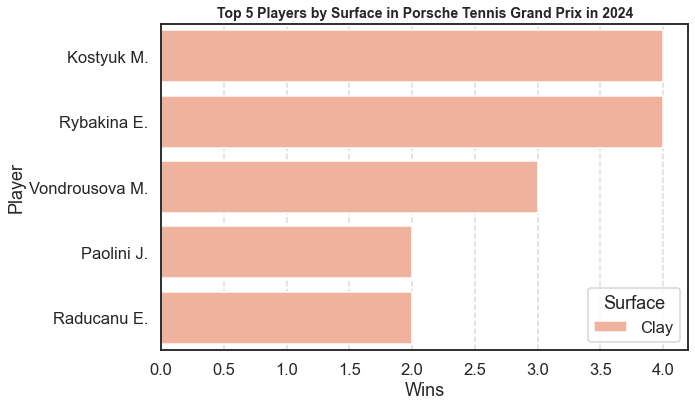

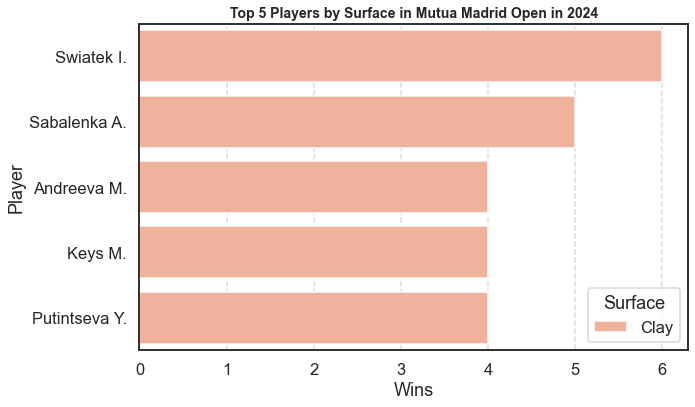

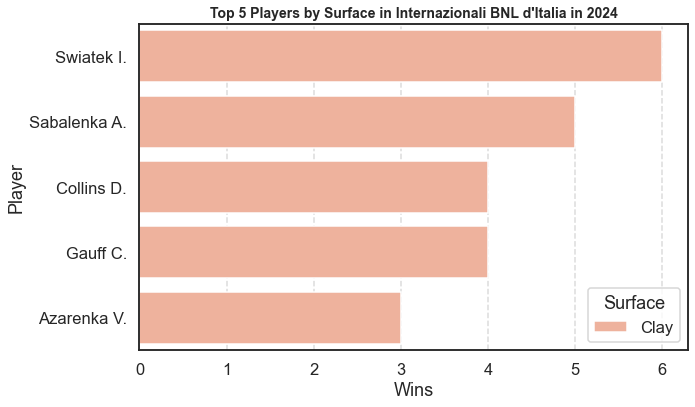

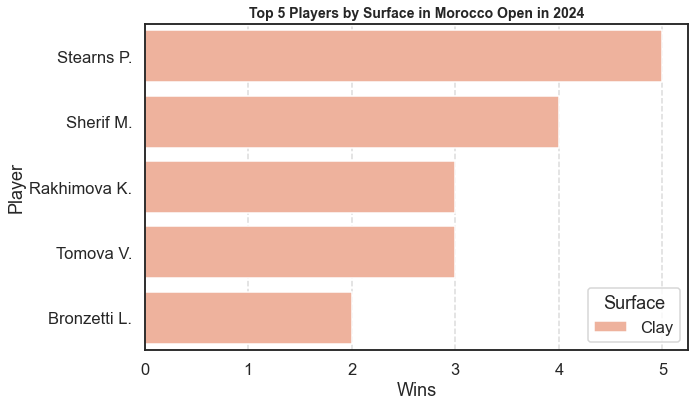

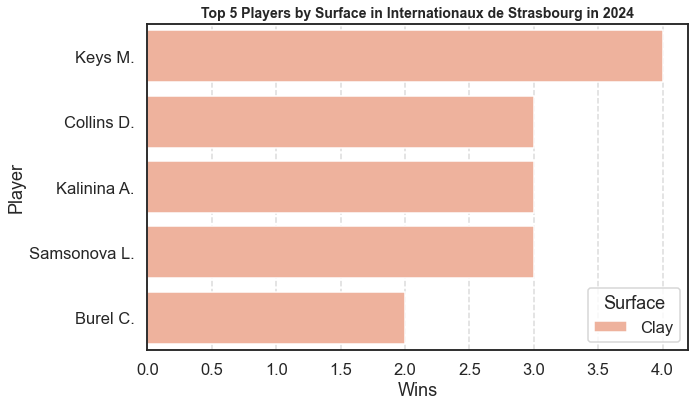

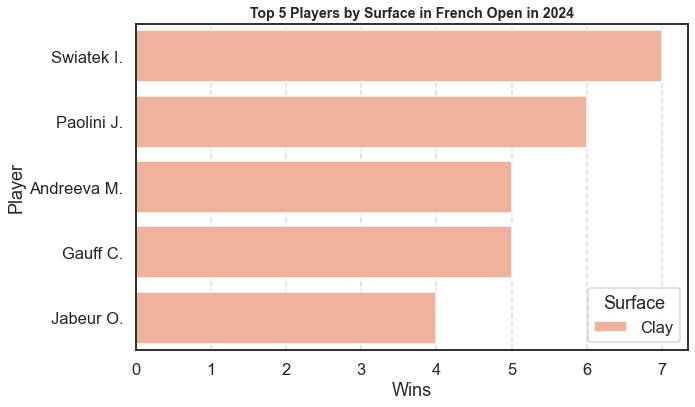

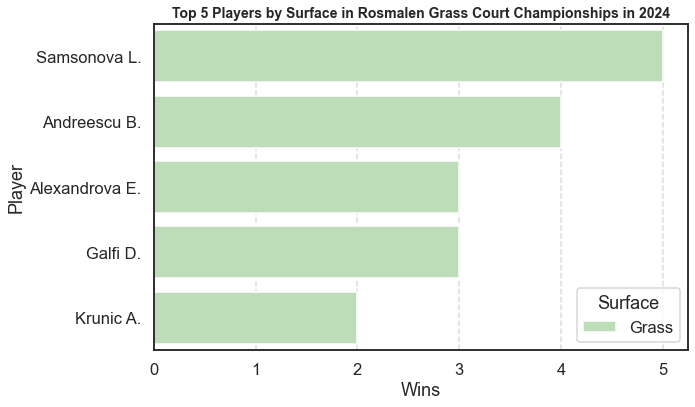

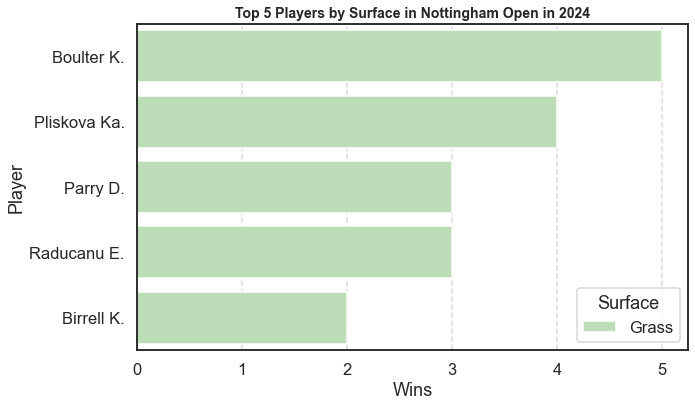

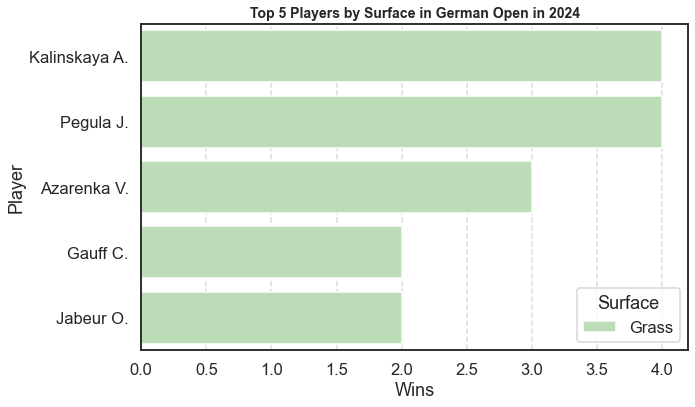

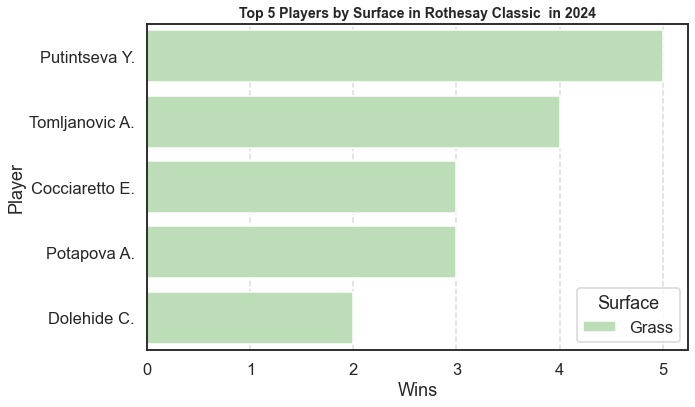

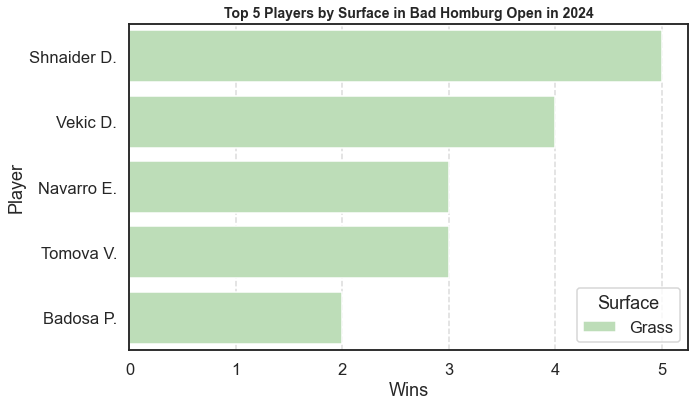

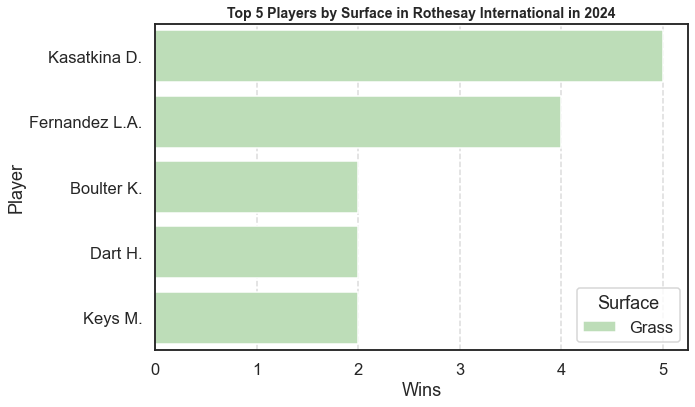

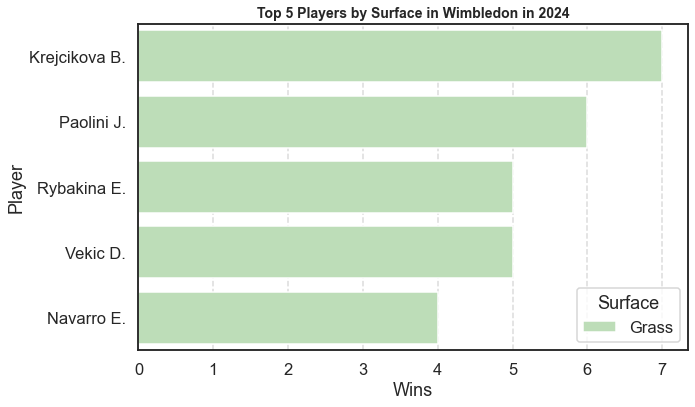

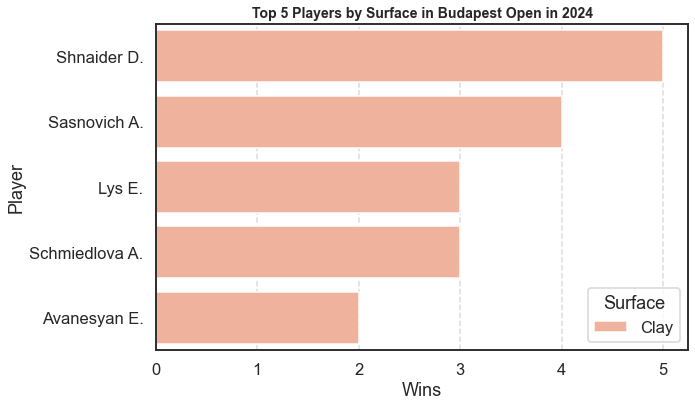

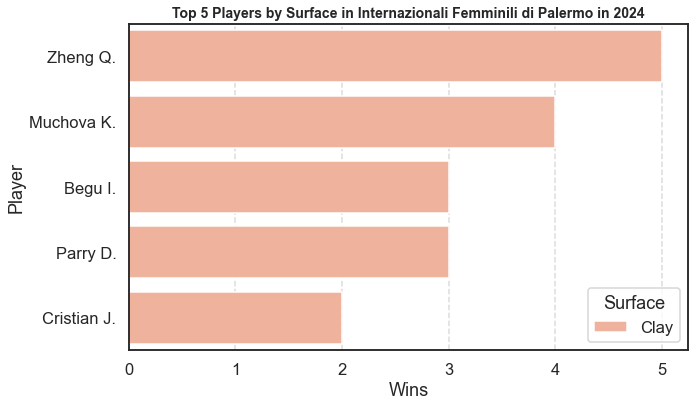

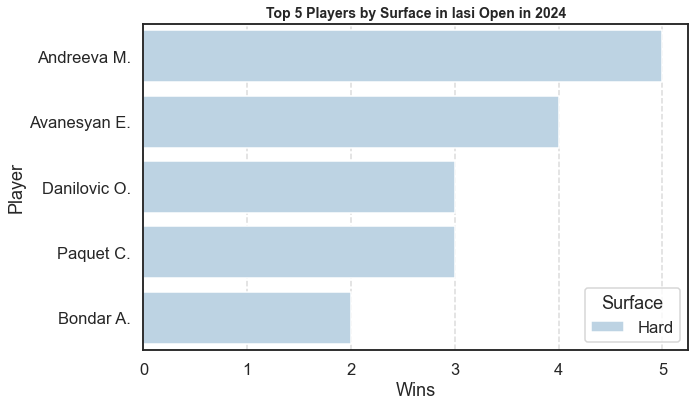

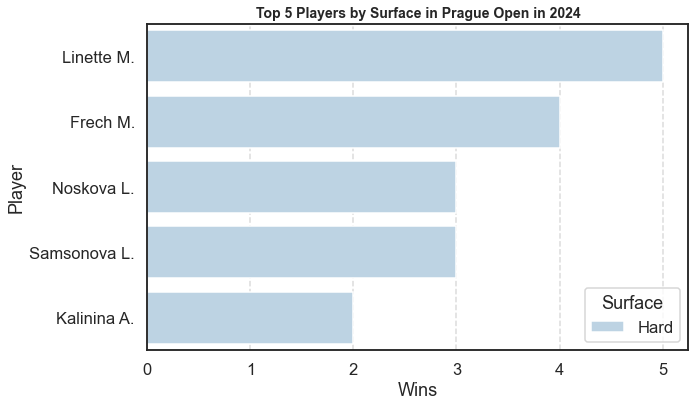

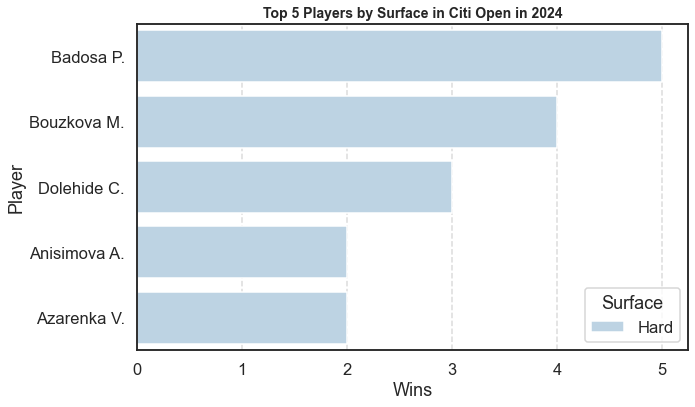

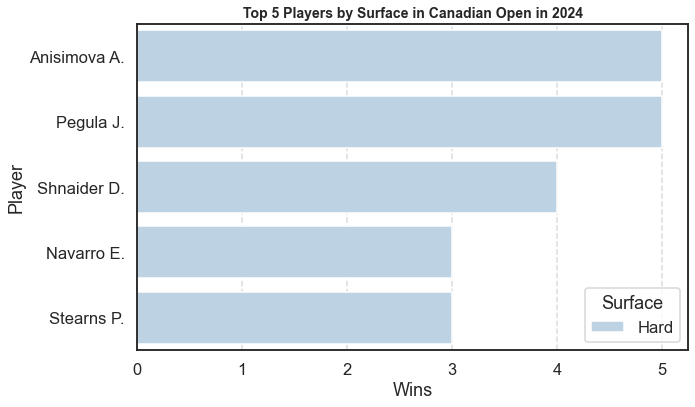

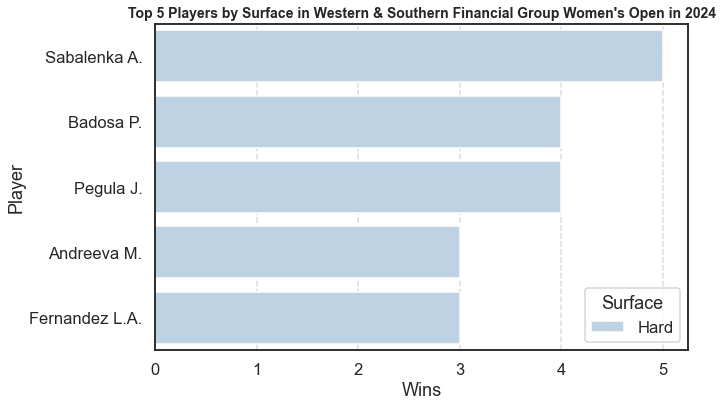

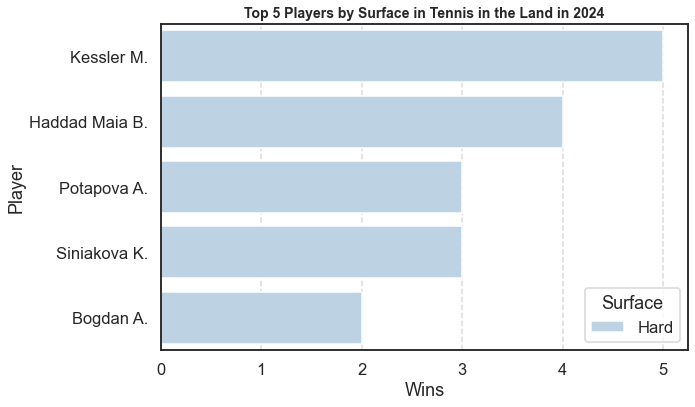

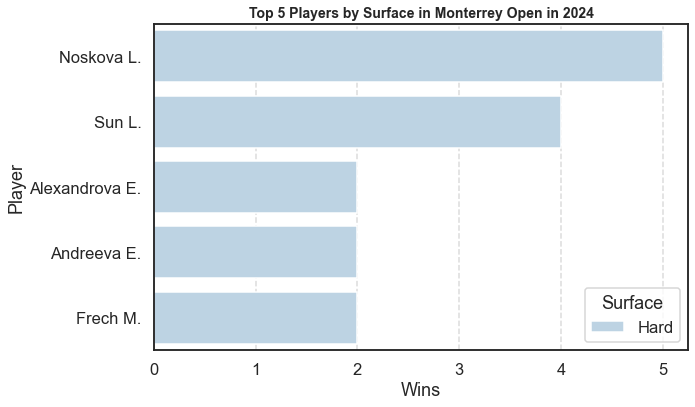

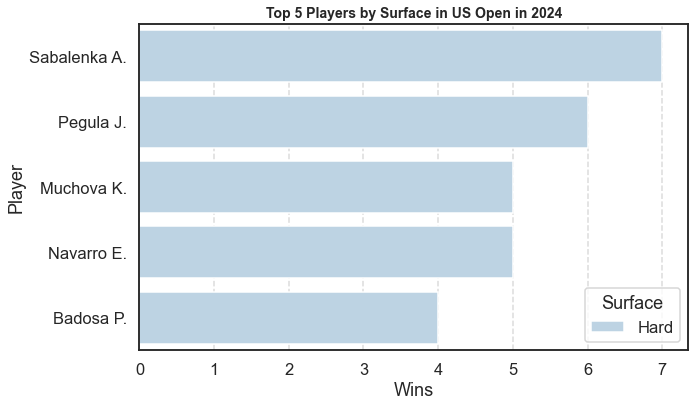

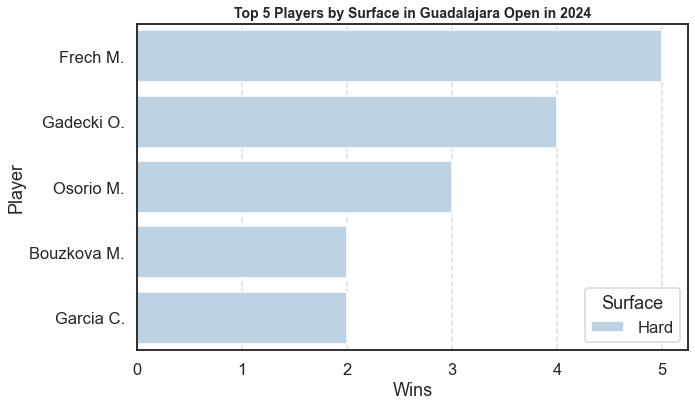

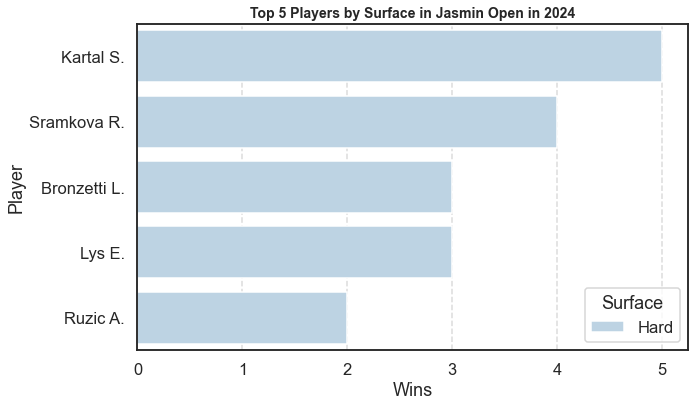

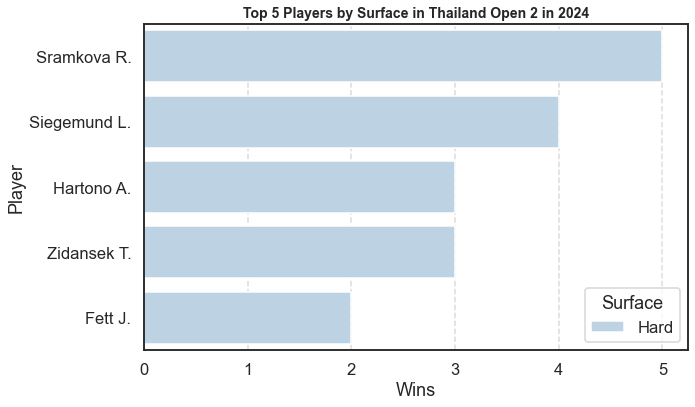

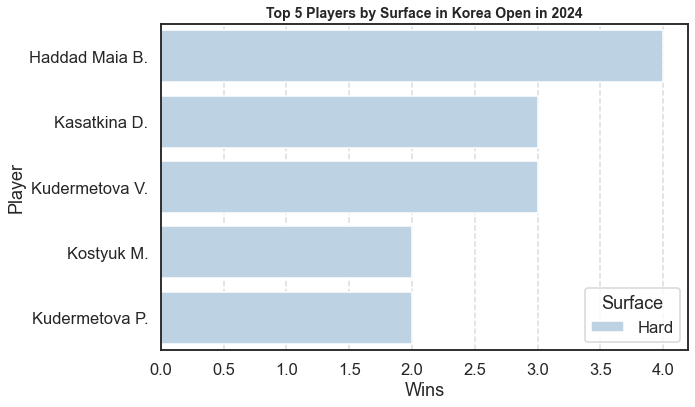

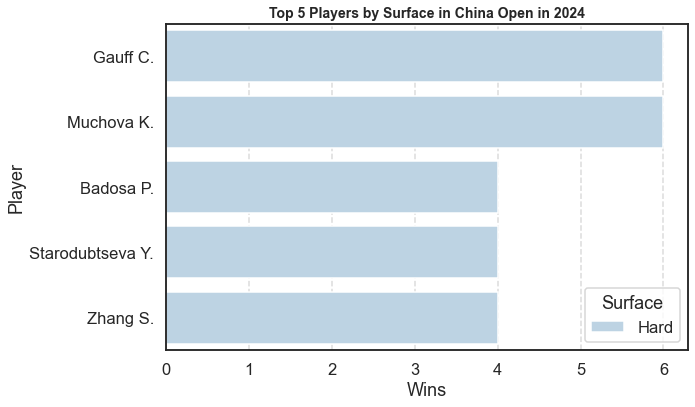

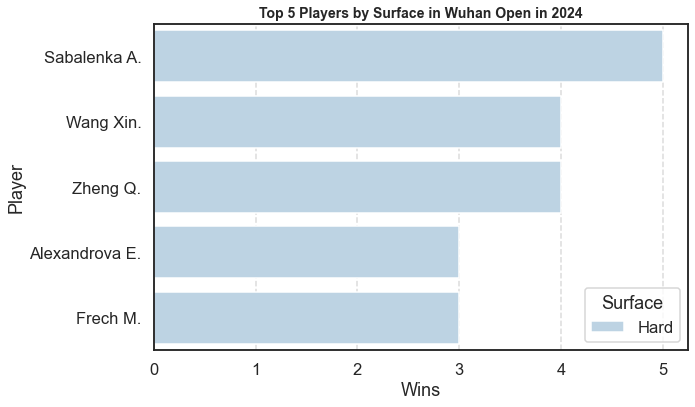

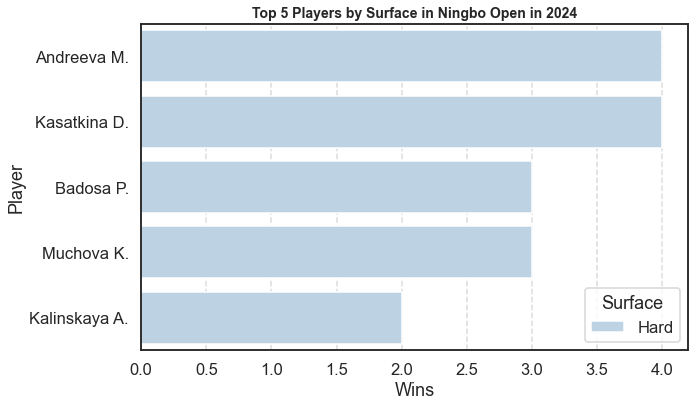

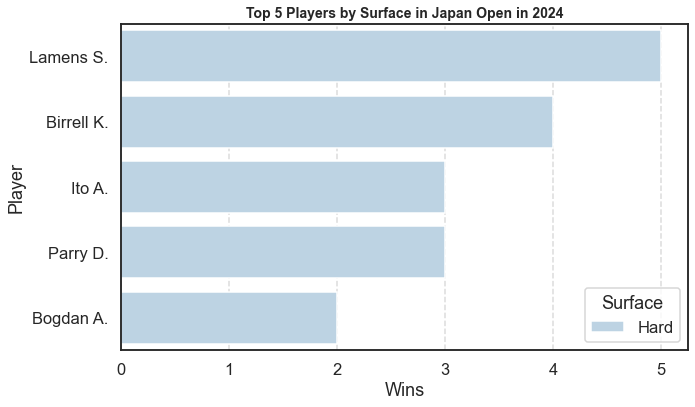

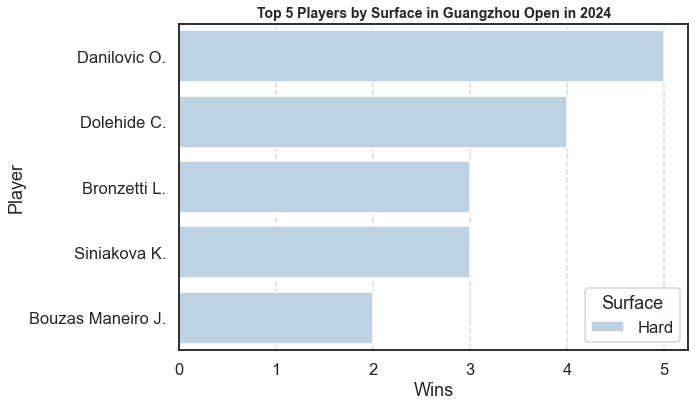

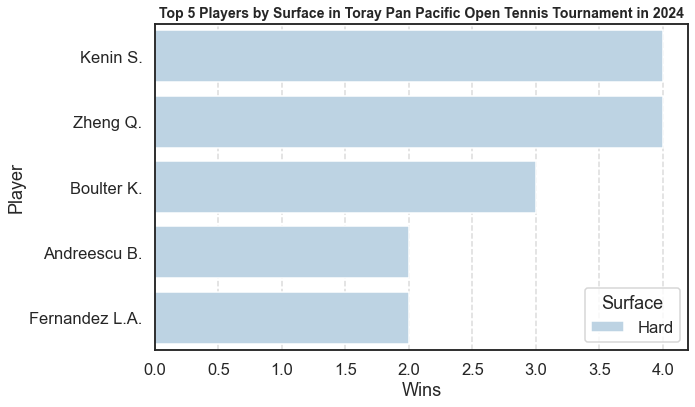

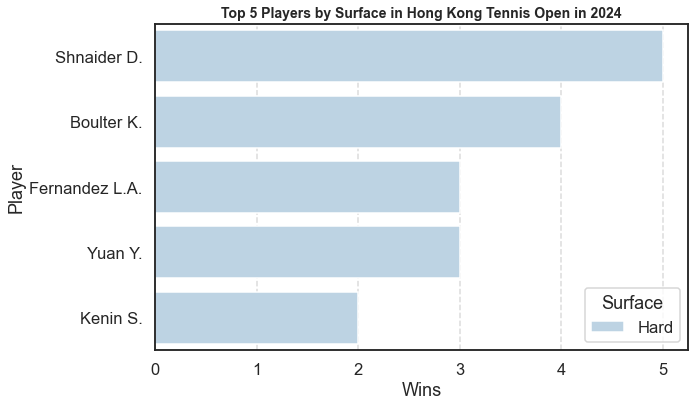

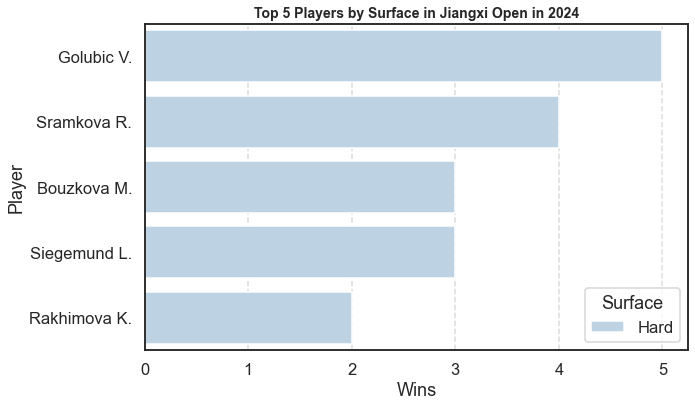

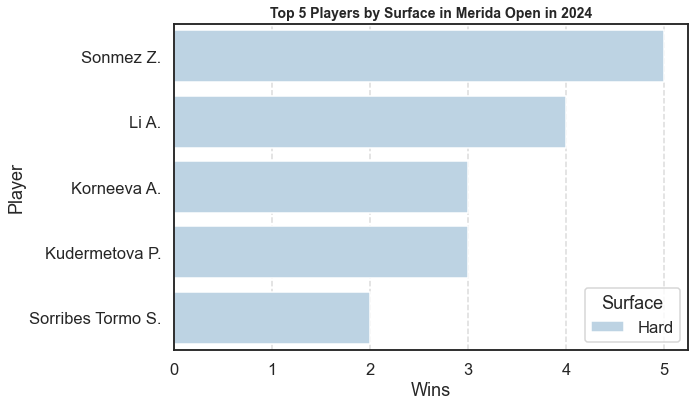

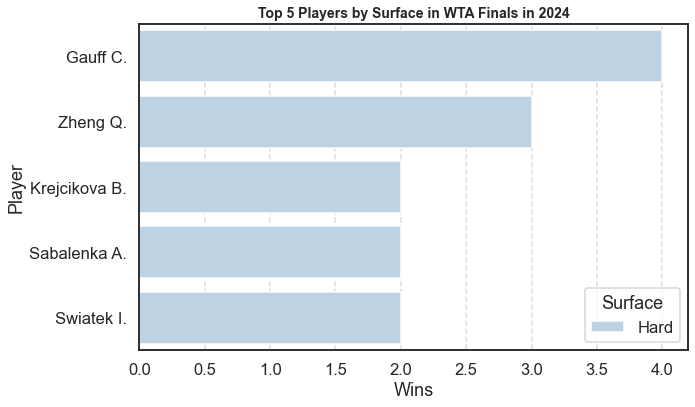

In [10]:
palette_map = {"Hard": "Blues_r", "Clay": "Reds_r", "Grass": "Greens_r"}

for tournament, df in tournament_results.items():

    df_melted = df.reset_index().melt(id_vars="Winner", var_name="Surface", value_name="Wins")

    df_melted = df_melted[df_melted["Wins"] > 0]


    top_5_players = df_melted.groupby("Surface").apply(lambda x: x.nlargest(5, "Wins")).reset_index(drop=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=top_5_players,
        x="Wins",
        y="Winner",
        hue="Surface",
        palette={surface: sns.color_palette(palette_map[surface], as_cmap=True)(0.7) for surface in top_5_players["Surface"].unique()}
    )

    plt.title(f"Top 5 Players by Surface in {tournament} in {year}", fontsize=14, fontweight='bold')
    plt.xlabel("Wins")
    plt.ylabel("Player")
    plt.legend(title="Surface")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.tight_layout()

    plt.show()